# quick numerical experiment showing mean min lifetime of exponential distribution
Tim Tyree<br>
4.19.2022

In [1]:
from lib import *

In [15]:
#reset matplotlib
import matplotlib as mpl
mpl.rcParams.update(matplotlib.rcParamsDefault)

# first formulation of MML

Suppose 

$$
\Gamma_\text{min}(i,j) \sim \frac{1}{\bar\Gamma/2} e^{-t'/(\bar\Gamma/2)} \;\;iid.
$$

We are interested in the mean minimum lifetime (MML) versus time until death ($t'$),
$$
\text{MML}(t') \equiv \mathbb{E}_A\Big[\frac{\Theta(\Gamma_\text{min}(i,j)-t')}{\Gamma_\text{min}(i,j)}\Big]
$$
For the exponential distribution, brute force simulation readily reveals
$$
\text{MML}(t') = (t'/\bar\Gamma/2)^{-\nu'}
$$
for $\nu'>0$.


In [162]:
scale=10.0
# scale=1.0
num_samples=int(10**5)
values=np.random.exponential(scale=scale, size=num_samples)


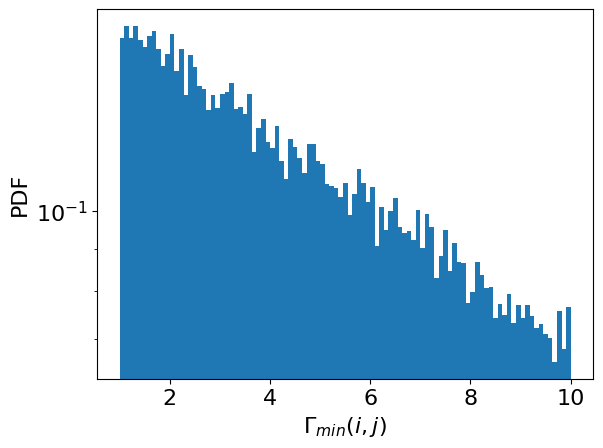

In [163]:
fontsize=16
bins=np.linspace(1,10,100)
plt.hist(values,bins=bins,density=True)
format_plot(ax=plt.gca(),xlabel=r'$\Gamma_{min}(i,j)$',ylabel='PDF',fontsize=fontsize)
plt.yscale('log')
plt.show()

In [164]:
#TODO: compute the mean minimum lifetime versus t
t_values=bins[::5]
mml_lst=[]
for t in t_values:
    mml_lst.append(np.mean(values[values>=t]**-1))
mml_values=np.array(mml_lst)
# mml_values

In [173]:
M,Delta_M,nu,Delta_nu,Rsq= fit_power_law(t_values, mml_values)
M,Delta_M,nu,Delta_nu,Rsq

(18.070957117914443,
 0.5848053518452421,
 -0.5404542782111422,
 0.01853569897442719,
 0.9945188285170543)

In [174]:
1.779141085544092**4

10.019396322026049

In [175]:
0.8316149866611852**-4

2.0907917180934095

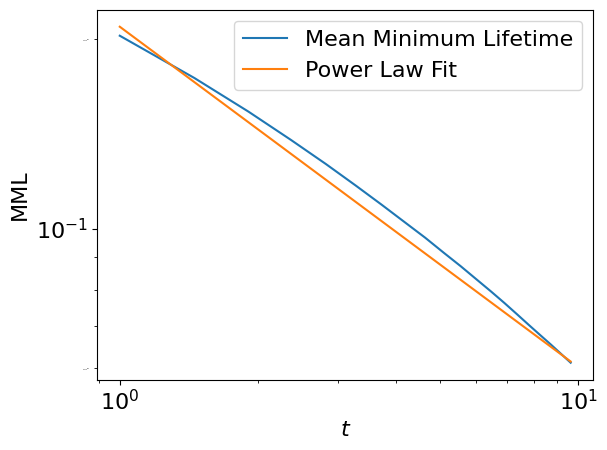

In [178]:
#TODO: plot the mean minimum lifetime versus t
fontsize=16
plt.plot(t_values,mml_values,label='Mean Minimum Lifetime')
# plt.plot(t_values,(1.779141085544092*t_values)**(-0.8316149866611852),label='Power Law Fit')
# yhat_values=(t_values/scale)**(-(2**(-1/4)))*0.6#/scale**5
# yhat_values=(t_values/scale)**(-(2**-(1/2)))#/scale**5
yhat_values=(t_values*M)**(nu)#/(scale)**(-(2**-(1/2)))#/scale**5
plt.plot(t_values,yhat_values,label='Power Law Fit')
# plt.plot(t_values,t_values+scale,label='Identity+1')

format_plot(ax=plt.gca(),xlabel=r'$t$',ylabel='MML',fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.xscale('log')
plt.yscale('log')
plt.show()

# second formulation of MML

Suppose 

$$
\Gamma_\text{min}(i,j) \sim \frac{1}{\bar\Gamma/2} e^{-t'/(\bar\Gamma/2)} \;\;iid.
$$

We are interested in the mean minimum lifetime (MML) versus time until death ($t'$),
$$
\text{MML}(t') \equiv \mathbb{E}_A\Big[\frac{\Theta(\Gamma_\text{min}(i,j)-t')}{\bar\Gamma/2}\Big]
$$
For the exponential distribution, brute force simulation readily reveals

